<a href="https://colab.research.google.com/github/KwonDuHyeon/hanghae99/blob/main/1%EC%A3%BC%EC%B0%A8_%EA%B8%B0%EB%B3%B8%EA%B3%BC%EC%A0%9C(%EA%B6%8C%EB%91%90%ED%98%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 1주차 기본과제 권두현


## 1. import 부분

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


## 2.1 Train Data set 설정 부분

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

## 2.2 Test Data Set 설정 부분(과제)

In [3]:
testset = torchvision.datasets.MNIST(
    root='./data',
    train = False,
    transform=transform
)

## 3.1 Train Data Set 데이터 확인

60000
torch.Size([1, 28, 28]) 5


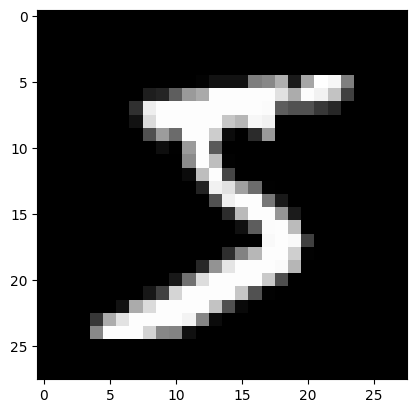

In [4]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

## 3.2 Test Data Set 데이터 확인(과제)

10000
torch.Size([1, 28, 28]) 7


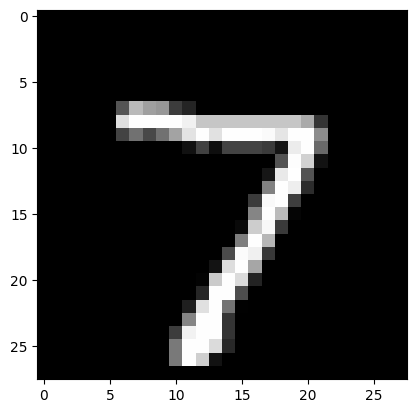

In [5]:
print(len(testset))
print(testset[0][0].shape, testset[0][1])
plt.imshow(testset[0][0][0], cmap='gray')

## 4.1 Train data set loader

In [6]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

## 4.2 Test data set loader(과제)

In [7]:
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

## 5. 첫번째 batch 출력


In [8]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


## 6. Model 부분(과제)

In [9]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim, num_classes = 10):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, num_classes)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x


model = Model(28 * 28 * 1, 1024)

##7. lr, optimizer 설정

In [10]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

## 8.accuracy 함수 추가

In [11]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

##9.Plot 함수추가

In [12]:
import numpy as np

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

## 8.epochs 및 crossentropyloss 적용(과제)

In [13]:
from logging import critical

train_accs = []
test_accs = []

n_epochs = 100
criterion = nn.CrossEntropyLoss()

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    loss = criterion(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  # train accuracy 부분
  train_accuracy = accuracy(model, trainloader)
  train_accs.append(train_accuracy)
  # test accuracy 부분
  test_accuracy = accuracy(model, testloader)
  test_accs.append(test_accuracy)

  print(f"Epoch {epoch:3d} | Loss: {total_loss} | train_accuracy : {train_accuracy} | test_accuracy : {test_accuracy}")

Epoch   0 | Loss: 529.6987340450287 | train_accuracy : 0.29861666666666664 | test_accuracy : 0.3182
Epoch   1 | Loss: 507.67620968818665 | train_accuracy : 0.51035 | test_accuracy : 0.5228
Epoch   2 | Loss: 483.19321405887604 | train_accuracy : 0.6066666666666667 | test_accuracy : 0.6183
Epoch   3 | Loss: 453.8629091978073 | train_accuracy : 0.6574833333333333 | test_accuracy : 0.6658
Epoch   4 | Loss: 418.97676956653595 | train_accuracy : 0.6953333333333334 | test_accuracy : 0.7019
Epoch   5 | Loss: 379.7193293571472 | train_accuracy : 0.7190666666666666 | test_accuracy : 0.7275
Epoch   6 | Loss: 339.3422518968582 | train_accuracy : 0.7453166666666666 | test_accuracy : 0.752
Epoch   7 | Loss: 301.30683147907257 | train_accuracy : 0.76805 | test_accuracy : 0.7783
Epoch   8 | Loss: 267.7779324054718 | train_accuracy : 0.7898833333333334 | test_accuracy : 0.7964
Epoch   9 | Loss: 239.73502308130264 | train_accuracy : 0.8037833333333333 | test_accuracy : 0.8089
Epoch  10 | Loss: 216.72109

## 9. 결과 plot 확인



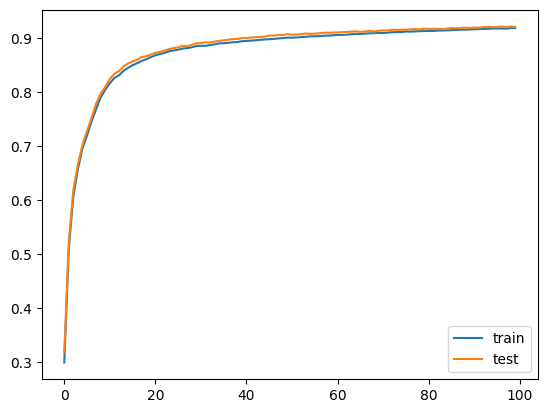

In [14]:
plot_acc(train_accs,test_accs)